In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('ggplot')
%matplotlib inline

In [3]:
df = pd.read_csv('../../_data/_raw/movies.csv')

In [4]:
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7668 entries, 0 to 7667
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      7668 non-null   object 
 1   rating    7591 non-null   object 
 2   genre     7668 non-null   object 
 3   year      7668 non-null   int64  
 4   released  7666 non-null   object 
 5   score     7665 non-null   float64
 6   votes     7665 non-null   float64
 7   director  7668 non-null   object 
 8   writer    7665 non-null   object 
 9   star      7667 non-null   object 
 10  country   7665 non-null   object 
 11  budget    5497 non-null   float64
 12  gross     7479 non-null   float64
 13  company   7651 non-null   object 
 14  runtime   7664 non-null   float64
dtypes: float64(5), int64(1), object(9)
memory usage: 898.7+ KB


In [6]:
df.describe()

,year,score,votes,budget,gross,runtime
count,7668.000000,7665.000000,7.665000e+03,5.497000e+03,7.479000e+03,7664.000000
mean,2000.405451,6.390411,8.810850e+04,3.558988e+07,7.850054e+07,107.261613
std,11.153508,0.968842,1.633238e+05,4.145730e+07,1.657251e+08,18.581247
min,1980.000000,1.900000,7.000000e+00,3.000000e+03,3.090000e+02,55.000000
25%,1991.000000,5.800000,9.100000e+03,1.000000e+07,4.532056e+06,95.000000
50%,2000.000000,6.500000,3.300000e+04,2.050000e+07,2.020576e+07,104.000000
75%,2010.000000,7.100000,9.300000e+04,4.500000e+07,7.601669e+07,116.000000
max,2020.000000,9.300000,2.400000e+06,3.560000e+08,2.847246e+09,366.000000


<AxesSubplot:>

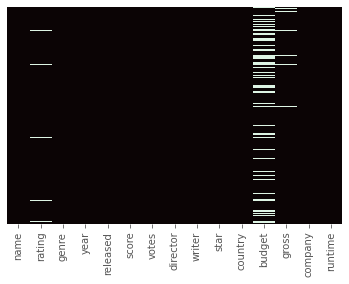

In [7]:
# Check for missing values
sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap='mako')

In [8]:
# Predict Budget Values
# Drop other values
df.dropna(subset=['rating'],axis=0, inplace=True)

<AxesSubplot:>

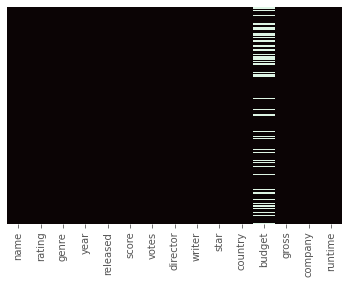

In [9]:
sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap='mako')

In [10]:
df.isnull().sum()

name           0
rating         0
genre          0
year           0
released       2
score          1
votes          1
director       0
writer         3
star           0
country        2
budget      2114
gross        166
company       12
runtime        3
dtype: int64

In [11]:
df['budget'].isnull()

0       False
1       False
2       False
3       False
4       False
        ...  
7655     True
7656     True
7658    False
7659     True
7661    False
Name: budget, Length: 7591, dtype: bool

In [42]:
budget_null = df[df['budget'].isnull()]

In [43]:
df['budget'].notnull()

0        True
1        True
2        True
3        True
4        True
        ...  
7655    False
7656    False
7658     True
7659    False
7661     True
Name: budget, Length: 7591, dtype: bool

In [44]:
budget_notnull = df[df['budget'].notnull()]

In [45]:
budget_notnull= budget_notnull.dropna()

In [46]:
budget_notnull.isnull().sum()

name        0
rating      0
genre       0
year        0
released    0
score       0
votes       0
director    0
writer      0
star        0
country     0
budget      0
gross       0
company     0
runtime     0
dtype: int64

<AxesSubplot:>

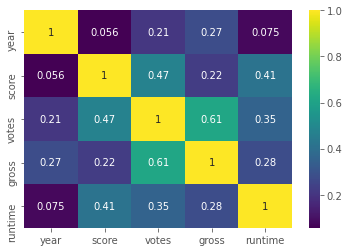

In [47]:
sns.heatmap(budget_notnull.drop('budget', axis=1).corr(), cmap='viridis', annot=True)

In [19]:
budget_notnull.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


In [20]:
budget_notnull.columns
# ['name', 'year', 'released', 'country']

Index(['name', 'rating', 'genre', 'year', 'released', 'score', 'votes',
       'director', 'writer', 'star', 'country', 'budget', 'gross', 'company',
       'runtime'],
      dtype='object')

In [48]:
budget_notnull.isnull().sum()

name        0
rating      0
genre       0
year        0
released    0
score       0
votes       0
director    0
writer      0
star        0
country     0
budget      0
gross       0
company     0
runtime     0
dtype: int64

In [49]:
budget_drop = budget_notnull.drop(['name', 'year', 'released', 'country'], axis=1)

In [50]:
for col in ['rating','genre','director', 'writer', 'star', 'company']:
    print(col, budget_drop[col].nunique())

rating 10
genre 15
director 2063
writer 3205
star 1845
company 1475


In [24]:
budget_drop = budget_drop.drop(['director','writer', 'star', 'company'], axis=1)

In [25]:
budget_drop.head()

,rating,genre,score,votes,budget,gross,runtime
0,R,Drama,8.4,927000.0,19000000.0,46998772.0,146.0
1,R,Adventure,5.8,65000.0,4500000.0,58853106.0,104.0
2,PG,Action,8.7,1200000.0,18000000.0,538375067.0,124.0
3,PG,Comedy,7.7,221000.0,3500000.0,83453539.0,88.0
4,R,Comedy,7.3,108000.0,6000000.0,39846344.0,98.0


In [26]:
from sklearn.model_selection import train_test_split

In [88]:
X = budget_drop.drop('budget', axis=1)
y = budget_drop['budget']

In [58]:
X.head()

,rating,genre,score,votes,director,writer,star,gross,company,runtime
0,R,Drama,8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,46998772.0,Warner Bros.,146.0
1,R,Adventure,5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,58853106.0,Columbia Pictures,104.0
2,PG,Action,8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,538375067.0,Lucasfilm,124.0
3,PG,Comedy,7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,83453539.0,Paramount Pictures,88.0
4,R,Comedy,7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,39846344.0,Orion Pictures,98.0


In [59]:
from sklearn.preprocessing import StandardScaler

In [60]:
scale = StandardScaler()

In [61]:
scaled_x = scale.fit_transform(X[['score', 'votes', 'gross', 'runtime']])

In [62]:
stdscaler = pd.DataFrame(scaled_x, columns=['score','votes','gross','runtime'])

In [80]:
stdscaler.isnull().sum()

score      0
votes      0
gross      0
runtime    0
dtype: int64

In [92]:
X.reset_index()[['score','votes','gross','runtime']] = stdscaler

In [93]:
X.isnull().sum()

rating      0
genre       0
score       0
votes       0
director    0
writer      0
star        0
gross       0
company     0
runtime     0
dtype: int64

In [56]:
X.isnull().sum()

score               1705
votes               1705
gross               1705
runtime             1705
rating_G               0
rating_NC-17           0
rating_Not Rated       0
rating_PG              0
rating_PG-13           0
rating_R               0
rating_TV-MA           0
rating_Unrated         0
rating_X               0
genre_Adventure        0
genre_Animation        0
genre_Biography        0
genre_Comedy           0
genre_Crime            0
genre_Drama            0
genre_Family           0
genre_Fantasy          0
genre_Horror           0
genre_Mystery          0
genre_Romance          0
genre_Sci-Fi           0
genre_Thriller         0
genre_Western          0
dtype: int64

In [36]:
X = pd.get_dummies(data=X, columns=['rating','genre'], drop_first=True)

In [37]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5421 entries, 0 to 7652
Data columns (total 27 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   score             3716 non-null   float64
 1   votes             3716 non-null   float64
 2   gross             3716 non-null   float64
 3   runtime           3716 non-null   float64
 4   rating_G          5421 non-null   uint8  
 5   rating_NC-17      5421 non-null   uint8  
 6   rating_Not Rated  5421 non-null   uint8  
 7   rating_PG         5421 non-null   uint8  
 8   rating_PG-13      5421 non-null   uint8  
 9   rating_R          5421 non-null   uint8  
 10  rating_TV-MA      5421 non-null   uint8  
 11  rating_Unrated    5421 non-null   uint8  
 12  rating_X          5421 non-null   uint8  
 13  genre_Adventure   5421 non-null   uint8  
 14  genre_Animation   5421 non-null   uint8  
 15  genre_Biography   5421 non-null   uint8  
 16  genre_Comedy      5421 non-null   uint8  


In [38]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=13)

In [39]:
from sklearn.linear_model import LinearRegression

In [40]:
lr_model = LinearRegression()

In [41]:

lr_model.fit(X_train, y_train)

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').